### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the original dataset

In [2]:
df = pd.read_csv('SN_Restaurant_Inspections.csv')

### Exploratory Data Analysis/ Data Cleaning

In [3]:
# The number of rows and columns present in the data set

print("Number of rows: ", df.shape[0])
print("Number of rows: ", df.shape[1])

Number of rows:  15673
Number of rows:  28


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15673 entries, 0 to 15672
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RESTAURANT_SERIAL_NUMBER  15673 non-null  object 
 1   RESTAURANT_PERMIT_NUMBER  15673 non-null  object 
 2   RESTAURANT_NAME           15608 non-null  object 
 3   RESTAURANT_LOCATION       15473 non-null  object 
 4   RESTAURANT_CATEGORY       15543 non-null  object 
 5   ADDRESS                   15603 non-null  object 
 6   CITY                      15437 non-null  object 
 7   STATE                     15464 non-null  object 
 8   ZIP                       15614 non-null  object 
 9   CURRENT_DEMERITS          15457 non-null  float64
 10  CURRENT_GRADE             15365 non-null  object 
 11  EMPLOYEE_COUNT            15580 non-null  float64
 12  MEDIAN_EMPLOYEE_AGE       15639 non-null  float64
 13  MEDIAN_EMPLOYEE_TENURE    15376 non-null  float64
 14  INSPEC

In [5]:
# Let's look at the first few rows of the dataset

df.head()

RESTAURANT_SERIAL_NUMBER RESTAURANT_PERMIT_NUMBER  \
0                DA1117270                PR0004527   
1                DA1014948                PR0024221   
2                DA0861994                PR0019017   
3                DA0896719                PR0001343   
4                DA1031041                PR0006084   

                     RESTAURANT_NAME              RESTAURANT_LOCATION  \
0      SANDS EXPO HALL B2 CONCESSION   SANDS EXPO & CONVENTION CENTER   
1     THAI NOODLES CAFE - RESTAURANT                THAI NOODLES CAFE   
2         SANTA FE SPORTS BOOK GRILL  Santa Fe Station Hotel & Casino   
3    Bracken, Walter Elem School Kit      Bracken, Walter Elem School   
4  HARD ROCK JOINT EAST SVC BAR FL 1         HARD ROCK HOTEL & CASINO   

         RESTAURANT_CATEGORY              ADDRESS       CITY   STATE  \
0                  Snack Bar      201 E Sands Ave  Las Vegas  Nevada   
1                 Restaurant  6710 W CHEYENNE Ave  Las Vegas  Nevada   
2                 Restaurant     4949 N Rancho Dr  Las Vegas  Nevada   
3  Elementary School Kitchen       1200 N 27Th St  Las Vegas  Nevada   
4               Bar / Tavern   4455 S Paradise Rd  Las Vegas  Nevada   

          ZIP  CURRENT_DEMERITS  ...   RECORD_UPDATED  \
0  89169-2617               0.0  ...   1/6/2015 16:34   
1  89108-4588               3.0  ...  2/21/2013 22:26   
2  89130-3505               8.0  ...    4/6/2015 9:00   
3  89101-1517               0.0  ...  2/21/2013 22:26   
4  89169-6574               0.0  ...  2/21/2013 22:26   

                LAT_LONG_RAW  FIRST_VIOLATION  SECOND_VIOLATION  \
0  (36.1221442, 115.1652749)            204.0             215.0   
1    (36.218691, 115.242913)            214.0             216.0   
2  (36.2498922, 115.2441383)            202.0             215.0   
3    (36.183669, 115.112355)            214.0             230.0   
4  (36.1100828, 115.1538714)            214.0             230.0   

  THIRD_VIOLATION FIRST_VIOLATION_TYPE SECOND_VIOLATION_TYPE  \
0           302.0             Critical                 Major   
1           229.0                Major                 Major   
2           233.0             Critical                 Major   
3           233.0                Major             Non-Major   
4           233.0                Major             Non-Major   

     THIRD_VIOLATION_TYPE NUMBER_OF_VIOLATIONS NEXT_GRADE_C_OR_BELOW  
0  Imminent Health Hazard                    4                     0  
1               Non-Major                    5                     0  
2               Non-Major                    3                     1  
3               Non-Major                    3                     0  
4               Non-Major                  NaN                     0  

[5 rows x 28 columns]

In [6]:
# Checking if there are any null values in the dataset

df.isnull().sum()

RESTAURANT_SERIAL_NUMBER      0
RESTAURANT_PERMIT_NUMBER      0
RESTAURANT_NAME              65
RESTAURANT_LOCATION         200
RESTAURANT_CATEGORY         130
ADDRESS                      70
CITY                        236
STATE                       209
ZIP                          59
CURRENT_DEMERITS            216
CURRENT_GRADE               308
EMPLOYEE_COUNT               93
MEDIAN_EMPLOYEE_AGE          34
MEDIAN_EMPLOYEE_TENURE      297
INSPECTION_TIME             183
INSPECTION_TYPE             221
INSPECTION_DEMERITS         254
VIOLATIONS_RAW              165
RECORD_UPDATED              119
LAT_LONG_RAW                 15
FIRST_VIOLATION             212
SECOND_VIOLATION             85
THIRD_VIOLATION              61
FIRST_VIOLATION_TYPE        146
SECOND_VIOLATION_TYPE       267
THIRD_VIOLATION_TYPE        173
NUMBER_OF_VIOLATIONS        169
NEXT_GRADE_C_OR_BELOW        40
dtype: int64

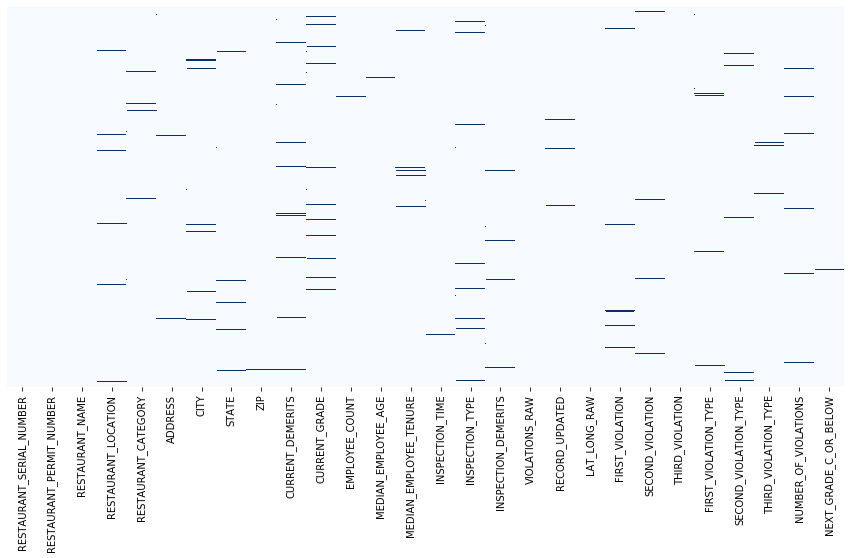

In [7]:
# Let's see how the null values are distributed throughout the dataset

fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap= 'Blues')

The heatmap shows the null values are not just concentrated to certain columns or certain rows

In [8]:
# To see if there are any more NaN values written differently, I'm creating a list of possible entries for those

missing = ["na", "n/a", "-", "--"]

# Creating a duplicate dataframe to assign these possible entries as the NaN values
df1 = pd.read_csv("SN_Restaurant_Inspections.csv", na_values = missing)

In [9]:
# Checking if this dataframe has more NaN values than the first dataframe

df1.isnull().sum()

RESTAURANT_SERIAL_NUMBER      0
RESTAURANT_PERMIT_NUMBER      0
RESTAURANT_NAME              65
RESTAURANT_LOCATION         200
RESTAURANT_CATEGORY         130
ADDRESS                      70
CITY                        236
STATE                       209
ZIP                          59
CURRENT_DEMERITS            216
CURRENT_GRADE               308
EMPLOYEE_COUNT               93
MEDIAN_EMPLOYEE_AGE          34
MEDIAN_EMPLOYEE_TENURE      297
INSPECTION_TIME             183
INSPECTION_TYPE             221
INSPECTION_DEMERITS         254
VIOLATIONS_RAW              165
RECORD_UPDATED              119
LAT_LONG_RAW                 15
FIRST_VIOLATION             212
SECOND_VIOLATION             85
THIRD_VIOLATION              61
FIRST_VIOLATION_TYPE        146
SECOND_VIOLATION_TYPE       267
THIRD_VIOLATION_TYPE        173
NUMBER_OF_VIOLATIONS        169
NEXT_GRADE_C_OR_BELOW        40
dtype: int64

The counts of the NaN values in each column of the second dataframe are identical to the first one

In [10]:
# Correlation heatmap to show correlation between the features in the dataset

corr = df.corr(method ='pearson') 
corr.fillna(0).style.background_gradient(cmap='coolwarm')

There is a very strong correlation between the second and third violations, which is close to 1. As the second column that's highly correlated does not offer much more information than the first column to the model I will drop the second column. I chose Third Violation column but the Second Violation could have also been dropped.

In [11]:
df.drop('THIRD_VIOLATION', axis=1, inplace=True)

Dropping unncessary columns that may not be helpful in predicting the inspection grade of the restaurants. Since I'll be building a logistic regression model, I will drop any columns that can't be used in the model due to the nature of logistic regression. I'll also be dropping unique identifiers such as restaurant serial number and restaurant permit number. The State column will also be dropped because the assumption is that the dataset should only contain data from the Southern Nevada area and only have 'Nevada' as the field for State. This column has no variance since it has the same field for every row. 

In [12]:
droplist = ['RESTAURANT_SERIAL_NUMBER', 'RESTAURANT_PERMIT_NUMBER', 'ADDRESS', 'RECORD_UPDATED', 'RESTAURANT_NAME',
        'RESTAURANT_LOCATION', 'RESTAURANT_CATEGORY', 'LAT_LONG_RAW', 'STATE', 'ZIP', 'CITY', 'VIOLATIONS_RAW',
            'INSPECTION_TIME']

df.drop(droplist, inplace=True, axis=1)

Any columns with demerits score should be numeric and should not have negative or scores more than 2 digits, based on the Health Inspection demerit score tables. 

First, I think the column Current Demerits is the only column for demerits that can have the NA values. Maybe the restaurant with NA as the Current Demerits score were not open long enough to have received the health inspection visit. Also, even though Current Demerits score is NA the Inspection Demerits may not have NA as the score. Therefore, I think the NA values in the Current Demerits should be replaced with 0

In [13]:
print("Count of >100: ", (df['CURRENT_DEMERITS'] > 100).sum())
print("Count of <0: ", (df['CURRENT_DEMERITS'] < 0).sum())

Count of >100:  3
Count of <0:  1


In [14]:
df = df[~(df['CURRENT_DEMERITS'] >= 100)]
df = df[~(df['CURRENT_DEMERITS'] < 0)]
df.CURRENT_DEMERITS.fillna(0, inplace=True)

As the Health Inspection report indicates, there should only be A, B, and C under the Current Grade column. There shouldn't be any other categories in this column

In [15]:
df['CURRENT_GRADE'].value_counts()

A             14914
B               215
C               101
X                75
O                32
N                 9
7                 2
K                 1
A+                1
U                 1
VPN               1
NASA              1
.\<><1@#&|        1
Name: CURRENT_GRADE, dtype: int64

Based on the list of categories above, I'm going to do the following:

- Delete rows containing letters other than A, B, C. The number of errors with these is small enough to delete them from this dataset without examining them deeper
- Replace A+ with A. This could have been a typo for A
- Leave X in the dataset. There is a significant number of rows containing X, which suggests that this may have not been a random typo or a simple error. Perhaps X was given to restaurants with a bad enough score to require them to close soon even though this is not part of the formal score list

In [16]:
df.drop(df[df.CURRENT_GRADE.isin(['O', 'N', '7', 'NASA', 'U', '.\<><1@#&|', 'VPN', 'K'])].index, inplace=True)
df['CURRENT_GRADE'] = df['CURRENT_GRADE'].replace(['A+'], 'A')

In [17]:
df.loc[df['CURRENT_GRADE'].isnull() & df['CURRENT_DEMERITS'].between(1, 10), 'CURRENT_GRADE'] = 'A'
df.loc[df['CURRENT_GRADE'].isnull() & df['CURRENT_DEMERITS'].between(11, 20), 'CURRENT_GRADE'] = 'B'
df.loc[df['CURRENT_GRADE'].isnull() & df['CURRENT_DEMERITS'].between(21, 40), 'CURRENT_GRADE'] = 'C'

In [18]:
# Let's check the count of remaining null values 

df['CURRENT_GRADE'].isnull().sum()

93

In [19]:
# Will drop remaining null values

df.drop(df[df['CURRENT_GRADE'].isnull()].index, inplace=True)

In [20]:
# Knowing there are some null values in this column, we should get an idea of how many staff an average restaurant has

print(df.EMPLOYEE_COUNT.mean())

22.362351721008622


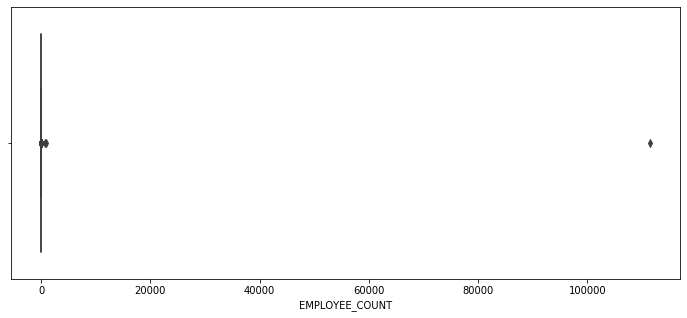

In [21]:
# Plot to show how employee counts are distributed throughout the restaruants

fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(df.EMPLOYEE_COUNT)

Based on the boxplot above, it looks like there is a small number of restaurants with a large number of staff. I think the average is skewed because of this. I'm going to use the median of the Employee Count column to impute the null values

In [22]:
print(df.EMPLOYEE_COUNT.median())

14.0


In [23]:
df.EMPLOYEE_COUNT.fillna(df['EMPLOYEE_COUNT'].median(), inplace=True)

In [24]:
# Checking for any negative entries in the employee count column

print("Count of < 0 in Employee Count: ", (df['EMPLOYEE_COUNT'] < 0).sum())

Count of < 0 in Employee Count:  1


In [25]:
df.drop(df[df.EMPLOYEE_COUNT < 0].index, inplace=True)

There's going to be some null values in the Median Employee Age column that should be replaced. I believe the best approach is to impute the missing values with the average of the Median Employee Age. In the dining industry, perhaps more than other industries, there is a significant number of younger workers who tend to work seasonally or temporarily (after graduation or in the summer when school is off). Depending on the time of the year I think the age of the restaurant staff could vary a lot. 

Text(0.5, 0, 'MEDIAN_EMPLOYEE_AGE')

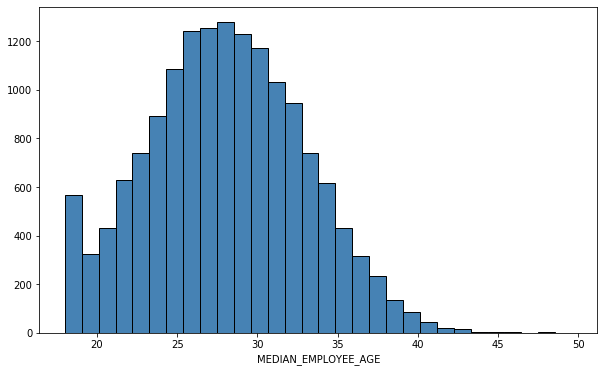

In [26]:
# Histogram to show how the workforce is distributed in terms of the median age

fig, ax = plt.subplots(figsize=(10,6))
plt.hist(df['MEDIAN_EMPLOYEE_AGE'], bins=30, color='steelblue', edgecolor='black')
plt.xlabel('MEDIAN_EMPLOYEE_AGE')

Not surprisingly, we tend to see workers in their mid 20s and early 30s dominate the industry. 
Based on this plot, I believe the best method for imputation for Employee Median Age is mode or median. The mean value can be skewed left of the number of young workers under 20.

In [27]:
print("Mean of Employee Age: ", df['MEDIAN_EMPLOYEE_AGE'].mean())
print("Median of Employee Age: ", df['MEDIAN_EMPLOYEE_AGE'].median())
print("Mode of Employee Age: ", df['MEDIAN_EMPLOYEE_AGE'].mode())

Mean of Employee Age:  28.01481373305004
Median of Employee Age:  27.96669442
Mode of Employee Age:  0    18.0
dtype: float64


In [28]:
df.MEDIAN_EMPLOYEE_AGE.fillna(df['MEDIAN_EMPLOYEE_AGE'].median(), inplace=True)

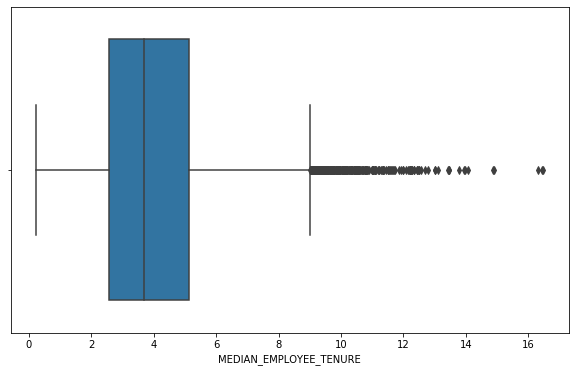

In [29]:
# Boxplot to show how the workforce is distributed in terms of the employee tenure

fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(df.MEDIAN_EMPLOYEE_TENURE)

The boxplot indicates while there are a few restaurants with a very low turnover rate, most have the employee 
tenure ranging between 3 to 5.

In [30]:
print("Mean of Employee Tenure: ", df['MEDIAN_EMPLOYEE_TENURE'].mean())
print("Median of Employee Tenure: ", df['MEDIAN_EMPLOYEE_TENURE'].median())
print("Mode of Employee Tenure: ", df['MEDIAN_EMPLOYEE_TENURE'].mode())

Mean of Employee Tenure:  4.026984754691621
Median of Employee Tenure:  3.691322205
Mode of Employee Tenure:  0         0.227197
1         0.251929
2         0.257812
3         0.259787
4         0.301725
           ...    
15220    14.873775
15221    14.907775
15222    16.314675
15223    16.433564
15224    16.481163
Length: 15225, dtype: float64


In [31]:
df.MEDIAN_EMPLOYEE_TENURE.fillna(df['MEDIAN_EMPLOYEE_TENURE'].mean(), inplace=True)

In [32]:
# Let's see what categories we have for Inspection Type

df['INSPECTION_TYPE'].value_counts()

Routine Inspection        14437
Re-inspection               862
Routine Non-Inspection        2
Name: INSPECTION_TYPE, dtype: int64

In [33]:
# The number of rows with error is small enough. Will drop them

df.INSPECTION_TYPE.fillna('Routine Inspection', inplace=True)
df = df[(df['INSPECTION_TYPE'].isin(['Routine Inspection', 'Re-inspection']))]

In [34]:
# Will change Inspection Demerits to numeric and check if there are any negative values

df["INSPECTION_DEMERITS"] = pd.to_numeric(df["INSPECTION_DEMERITS"])
print("Count of < 0 in Inspection Demerits: ", (df['INSPECTION_DEMERITS'] < 0).sum())

Count of < 0 in Inspection Demerits:  0


In [35]:
# Will impute the null values in Inspection Demerits with either the mode or the median because the mean value 
# may be in decimals and could be skewed due to other restaurants with high demerits

print("Median of Inspection Demerits: ", df['INSPECTION_DEMERITS'].median())
print("Mode of Inspection Demerits: ", df['INSPECTION_DEMERITS'].mode())

Median of Inspection Demerits:  10.0
Mode of Inspection Demerits:  0    10.0
dtype: float64


In [36]:
# Both median and mode are identical

df.INSPECTION_DEMERITS.fillna(10, inplace=True)

In [37]:
# Let's see what types of violation are most frequently recorded

df['FIRST_VIOLATION'].value_counts(dropna=True)

202.0        2843
209.0        1454
211.0        1425
214.0        1195
206.0         964
             ... 
29.0            3
15.0            2
17.0            2
8675309.0       1
3.0             1
Name: FIRST_VIOLATION, Length: 68, dtype: int64

In [38]:
df['SECOND_VIOLATION'].value_counts(dropna=True)

211.0    1593
209.0    1419
215.0    1167
214.0    1124
212.0     892
         ... 
10.0        2
15.0        2
301.0       1
61.0        1
8.0         1
Name: SECOND_VIOLATION, Length: 73, dtype: int64

I think the values in FIRST, SECOND, THIRD VIOLATION columns are maybe the types or codes of violation, considering some restaurants have more of the same codes than other ones.

In [39]:
# The FIRST VIOLATION column has a value that's unusually big. I'm going to delete this row

df.drop(df[df.FIRST_VIOLATION == 8675309.0].index, inplace=True)

In [40]:
# I'll delete rows that have NAs in more than one column between FIRST and SECOND VIOLATION

NArows = df[df['FIRST_VIOLATION'].isnull() & df['SECOND_VIOLATION'].isnull()]
NArows

Empty DataFrame
Columns: [CURRENT_DEMERITS, CURRENT_GRADE, EMPLOYEE_COUNT, MEDIAN_EMPLOYEE_AGE, MEDIAN_EMPLOYEE_TENURE, INSPECTION_TYPE, INSPECTION_DEMERITS, FIRST_VIOLATION, SECOND_VIOLATION, FIRST_VIOLATION_TYPE, SECOND_VIOLATION_TYPE, THIRD_VIOLATION_TYPE, NUMBER_OF_VIOLATIONS, NEXT_GRADE_C_OR_BELOW]
Index: []

Since it wouldn't make sense to use the mean value for the internal code for a violation (categorical), I'll be using the median to impute the NA values 

In [41]:
df.FIRST_VIOLATION.fillna(202, inplace=True)
df.SECOND_VIOLATION.fillna(211, inplace=True)

In [42]:
df['FIRST_VIOLATION_TYPE'].value_counts(dropna=True)

Critical                  7132
Major                     6659
Non-Major                 1575
Imminent Health Hazard       3
Extra Crispy                 1
Not Sure                     1
Bullwinkle                   1
Name: FIRST_VIOLATION_TYPE, dtype: int64

In [43]:
df['SECOND_VIOLATION_TYPE'].value_counts(dropna=True)

Major                     7830
Non-Major                 4456
Critical                  2957
Imminent Health Hazard       5
Supercritical                1
Kitchen Nightmares           1
Name: SECOND_VIOLATION_TYPE, dtype: int64

In [44]:
df['THIRD_VIOLATION_TYPE'].value_counts(dropna=True)

Major                     7242
Non-Major                 7203
Critical                   861
Imminent Health Hazard      37
Name: THIRD_VIOLATION_TYPE, dtype: int64

In [45]:
NArows2 = df[df['FIRST_VIOLATION_TYPE'].isnull() & 
             df['SECOND_VIOLATION_TYPE'].isnull() &
             df['THIRD_VIOLATION_TYPE'].isnull()]
NArows2

Empty DataFrame
Columns: [CURRENT_DEMERITS, CURRENT_GRADE, EMPLOYEE_COUNT, MEDIAN_EMPLOYEE_AGE, MEDIAN_EMPLOYEE_TENURE, INSPECTION_TYPE, INSPECTION_DEMERITS, FIRST_VIOLATION, SECOND_VIOLATION, FIRST_VIOLATION_TYPE, SECOND_VIOLATION_TYPE, THIRD_VIOLATION_TYPE, NUMBER_OF_VIOLATIONS, NEXT_GRADE_C_OR_BELOW]
Index: []

In [46]:
NArows2 = df[df['FIRST_VIOLATION_TYPE'].isnull() &  df['THIRD_VIOLATION_TYPE'].isnull()]

NArows2

CURRENT_DEMERITS CURRENT_GRADE  EMPLOYEE_COUNT  MEDIAN_EMPLOYEE_AGE  \
8818               8.0             A             3.0              29.2155   

      MEDIAN_EMPLOYEE_TENURE     INSPECTION_TYPE  INSPECTION_DEMERITS  \
8818                2.158529  Routine Inspection                  5.0   

      FIRST_VIOLATION  SECOND_VIOLATION FIRST_VIOLATION_TYPE  \
8818             25.0              28.0                  NaN   

     SECOND_VIOLATION_TYPE THIRD_VIOLATION_TYPE NUMBER_OF_VIOLATIONS  \
8818             Non-Major                  NaN                    5   

     NEXT_GRADE_C_OR_BELOW  
8818                     0

In [47]:
NArows2 = df[df['SECOND_VIOLATION_TYPE'].isnull() &  df['THIRD_VIOLATION_TYPE'].isnull()]

NArows2

CURRENT_DEMERITS CURRENT_GRADE  EMPLOYEE_COUNT  MEDIAN_EMPLOYEE_AGE  \
3439                8.0             A             3.0            29.750183   
5689                3.0             A            11.0            18.000000   
5733                0.0             A            14.0            27.434754   
12731               8.0             A            22.0            24.944689   
13506               6.0             A            27.0            38.034579   

       MEDIAN_EMPLOYEE_TENURE     INSPECTION_TYPE  INSPECTION_DEMERITS  \
3439                 4.307051  Routine Inspection                 29.0   
5689                 2.608568  Routine Inspection                 10.0   
5733                 2.051948  Routine Inspection                 19.0   
12731                5.170724  Routine Inspection                 41.0   
13506                2.417586  Routine Inspection                 29.0   

       FIRST_VIOLATION  SECOND_VIOLATION FIRST_VIOLATION_TYPE  \
3439             202.0             211.0             Critical   
5689             212.0             216.0                Major   
5733             202.0             209.0             Critical   
12731            202.0             204.0             Critical   
13506            202.0             211.0             Critical   

      SECOND_VIOLATION_TYPE THIRD_VIOLATION_TYPE NUMBER_OF_VIOLATIONS  \
3439                    NaN                  NaN                   13   
5689                    NaN                  NaN                    6   
5733                    NaN                  NaN                    6   
12731                   NaN                  NaN                   15   
13506                   NaN                  NaN                   13   

      NEXT_GRADE_C_OR_BELOW  
3439                      1  
5689                      0  
5733                      0  
12731                     0  
13506                     0

In [48]:
NArows2 = df[df['FIRST_VIOLATION_TYPE'].isnull() & df['SECOND_VIOLATION_TYPE'].isnull()]

NArows2

CURRENT_DEMERITS CURRENT_GRADE  EMPLOYEE_COUNT  MEDIAN_EMPLOYEE_AGE  \
625                 3.0             A            20.0            31.181829   
3222                3.0             A             3.0            20.199490   
5220                3.0             A             3.0            38.090143   
6525                0.0             A            10.0            23.867060   
9022                0.0             A             3.0            30.535286   
9591                6.0             A            25.0            33.083350   
10521              10.0             A            38.0            18.000000   

       MEDIAN_EMPLOYEE_TENURE     INSPECTION_TYPE  INSPECTION_DEMERITS  \
625                  3.294627  Routine Inspection                 38.0   
3222                 5.569221  Routine Inspection                  4.0   
5220                 1.855134  Routine Inspection                  8.0   
6525                 5.692352  Routine Inspection                 20.0   
9022                10.179891  Routine Inspection                 12.0   
9591                 5.682881  Routine Inspection                 17.0   
10521                3.760482  Routine Inspection                 10.0   

       FIRST_VIOLATION  SECOND_VIOLATION FIRST_VIOLATION_TYPE  \
625              202.0             206.0                  NaN   
3222             228.0             230.0                  NaN   
5220             213.0             218.0                  NaN   
6525             202.0             211.0                  NaN   
9022             211.0             212.0                  NaN   
9591             206.0             211.0                  NaN   
10521             14.0              28.0                  NaN   

      SECOND_VIOLATION_TYPE THIRD_VIOLATION_TYPE NUMBER_OF_VIOLATIONS  \
625                     NaN                Major                   16   
3222                    NaN            Non-Major                    4   
5220                    NaN            Non-Major                    4   
6525                    NaN                Major                    8   
9022                    NaN                Major                    6   
9591                    NaN                Major                    7   
10521                   NaN            Non-Major                    4   

      NEXT_GRADE_C_OR_BELOW  
625                       1  
3222                      0  
5220                      0  
6525                      1  
9022                      0  
9591                      0  
10521                     1

In [49]:
df.drop(df[df['FIRST_VIOLATION_TYPE'].isnull() & df['THIRD_VIOLATION_TYPE'].isnull()].index, inplace=True)
df.drop(df[df['FIRST_VIOLATION_TYPE'].isnull() & df['SECOND_VIOLATION_TYPE'].isnull()].index, inplace=True)

In [50]:
# Because these are also categorical columns, I'll replace the NA values with the mode of each column similar to 
# what I did to the FIRST, SECOND, and THIRD VIOLATION columns

df.FIRST_VIOLATION_TYPE.fillna('Critical', inplace=True)
df.SECOND_VIOLATION_TYPE.fillna('Major', inplace=True)
df.THIRD_VIOLATION_TYPE.fillna('Major', inplace=True)

In [51]:
df = df[(df['FIRST_VIOLATION_TYPE'].isin(['Major', 'Non-Major', 'Critical']))]
df = df[(df['SECOND_VIOLATION_TYPE'].isin(['Major', 'Non-Major', 'Critical']))]
df = df[(df['THIRD_VIOLATION_TYPE'].isin(['Major', 'Non-Major', 'Critical']))]

In [52]:
df['FIRST_VIOLATION_TYPE'] = df['FIRST_VIOLATION_TYPE'].replace(['Non-Major'], 'Nonmajor')
df['SECOND_VIOLATION_TYPE'] = df['SECOND_VIOLATION_TYPE'].replace(['Non-Major'], 'Nonmajor')
df['THIRD_VIOLATION_TYPE'] = df['THIRD_VIOLATION_TYPE'].replace(['Non-Major'], 'Nonmajor')

In [53]:
df['NUMBER_OF_VIOLATIONS'] = pd.to_numeric(df['NUMBER_OF_VIOLATIONS'])

In [54]:
# For imputing the missing values in the number of violations, I'm going to use the mode because it wouldn't make 
# sense to have a number with decimals or simply choose a number that's in the middle of the distribution of the 
# count of violations

df['NUMBER_OF_VIOLATIONS'].mode()

0    3.0
dtype: float64

In [55]:
df.NUMBER_OF_VIOLATIONS.fillna(3, inplace=True)

In [56]:
# The target column (NEXT_INSPECTION_GRADE_C_OR_BELOW) for our model should have only 0 and 1

df['NEXT_GRADE_C_OR_BELOW'].value_counts()

0     12984
1      2442
-3        1
7         1
Name: NEXT_GRADE_C_OR_BELOW, dtype: int64

In [57]:
df.drop(df[df['NEXT_GRADE_C_OR_BELOW'].isnull()].index, inplace=True)
df.drop(df[df['NEXT_GRADE_C_OR_BELOW'] == '7'].index, inplace = True)
df.drop(df[df['NEXT_GRADE_C_OR_BELOW'] == '-3'].index, inplace = True)

df["NEXT_GRADE_C_OR_BELOW"] = pd.to_numeric(df["NEXT_GRADE_C_OR_BELOW"])

In [58]:
# Checking if there are any remaining null values in the dataset

df.isnull().sum()

CURRENT_DEMERITS          0
CURRENT_GRADE             0
EMPLOYEE_COUNT            0
MEDIAN_EMPLOYEE_AGE       0
MEDIAN_EMPLOYEE_TENURE    0
INSPECTION_TYPE           0
INSPECTION_DEMERITS       0
FIRST_VIOLATION           0
SECOND_VIOLATION          0
FIRST_VIOLATION_TYPE      0
SECOND_VIOLATION_TYPE     0
THIRD_VIOLATION_TYPE      0
NUMBER_OF_VIOLATIONS      0
NEXT_GRADE_C_OR_BELOW     0
dtype: int64

In [59]:
# I'm going to create a copy of the cleaned dataset for the dashboard I will build later

df_copy = df.copy()

### Building the Predictive Model

I'll be applying logistic regression to the dataset to predict whether the restaurants will receive Grade C or below on their next inspection. I think it makes sense to use logistic regression to predict this feature since we're trying to predict an outcome that is either a yes or no (or 0 vs 1). 

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
# For our model, I'll be converting categorical columns to dummy columns

dummycols =['CURRENT_GRADE', 'INSPECTION_TYPE', 'FIRST_VIOLATION_TYPE', 
               'SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE']

newdf = pd.get_dummies(df[dummycols],drop_first=True)
newdf

CURRENT_GRADE_B  CURRENT_GRADE_C  CURRENT_GRADE_X  \
1                    0                0                0   
2                    0                0                0   
3                    0                0                0   
4                    0                0                0   
5                    0                0                0   
...                ...              ...              ...   
15668                0                0                0   
15669                0                0                0   
15670                0                0                0   
15671                0                0                0   
15672                0                0                0   

       INSPECTION_TYPE_Routine Inspection  FIRST_VIOLATION_TYPE_Major  \
1                                       1                           1   
2                                       1                           0   
3                                       1                           1   
4                                       1                           1   
5                                       1                           0   
...                                   ...                         ...   
15668                                   1                           0   
15669                                   1                           1   
15670                                   1                           0   
15671                                   1                           1   
15672                                   1                           1   

       FIRST_VIOLATION_TYPE_Nonmajor  SECOND_VIOLATION_TYPE_Major  \
1                                  0                            1   
2                                  0                            1   
3                                  0                            0   
4                                  0                            0   
5                                  0                            1   
...                              ...                          ...   
15668                              0                            0   
15669                              0                            0   
15670                              0                            1   
15671                              0                            1   
15672                              0                            0   

       SECOND_VIOLATION_TYPE_Nonmajor  THIRD_VIOLATION_TYPE_Major  \
1                                   0                           0   
2                                   0                           0   
3                                   1                           0   
4                                   1                           0   
5                                   0                           1   
...                               ...                         ...   
15668                               1                           0   
15669                               1                           0   
15670                               0                           1   
15671                               0                           0   
15672                               1                           0   

       THIRD_VIOLATION_TYPE_Nonmajor  
1                                  1  
2                                  1  
3                                  1  
4                                  1  
5                                  0  
...                              ...  
15668                              1  
15669                              1  
15670                              0  
15671                              1  
15672                              1  

[15426 rows x 10 columns]

In [62]:
# Adding the dummy columns to the original dataframe and dropping the original set of columns
df = pd.concat([df,newdf],axis=1)
df.drop(dummycols,axis=1,inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15426 entries, 1 to 15672
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CURRENT_DEMERITS                    15426 non-null  float64
 1   EMPLOYEE_COUNT                      15426 non-null  float64
 2   MEDIAN_EMPLOYEE_AGE                 15426 non-null  float64
 3   MEDIAN_EMPLOYEE_TENURE              15426 non-null  float64
 4   INSPECTION_DEMERITS                 15426 non-null  float64
 5   FIRST_VIOLATION                     15426 non-null  float64
 6   SECOND_VIOLATION                    15426 non-null  float64
 7   NUMBER_OF_VIOLATIONS                15426 non-null  float64
 8   NEXT_GRADE_C_OR_BELOW               15426 non-null  int64  
 9   CURRENT_GRADE_B                     15426 non-null  uint8  
 10  CURRENT_GRADE_C                     15426 non-null  uint8  
 11  CURRENT_GRADE_X                     15426

In [64]:
# Splitting the training dataset into x and y

y_train = df['NEXT_GRADE_C_OR_BELOW'] 
x_train = df.drop(['NEXT_GRADE_C_OR_BELOW'], axis = 1)

In [65]:
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

/Users/sophielee/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [66]:
# Model score:

model.score(x_train, y_train)

0.8413717100998315

### Drift Analysis

Drift analysis process identifies possible differences in the training and production datasets. To see if the data has shifted significantly, I used the more recent dataset with the same features as the original dataset to compare the data side by side. Model drift happens when changes or a significant shift in the data cause the model to be no longer relevant or useful. Because the data has changed the model is no longer effective at predicting the outcome. 

In [67]:
from evidently.dashboard import Dashboard
from evidently.tabs import DataDriftTab
from sklearn.preprocessing import LabelEncoder

/Users/sophielee/opt/anaconda3/lib/python3.7/site-packages/evidently/tabs/__init__.py:8: UserWarning: 'import evidently.tabs' is deprecated, use 'import evidently.dashboard.tabs'
  warnings.warn("'import evidently.tabs' is deprecated, use 'import evidently.dashboard.tabs'")


In [68]:
# Load the recent dataset that's been changed from the originial dataset

newdata = pd.read_csv('SN_Restaurant_Inspections_v2.csv')

In [69]:
labelencoder = LabelEncoder()

catcols =['CURRENT_GRADE', 'INSPECTION_TYPE', 'FIRST_VIOLATION_TYPE', 
               'SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE']

In [70]:
for catcol in catcols:
    df_copy[catcol] = labelencoder.fit_transform(df_copy[catcol])

In [71]:
# I'm interested in finding out if there's been any changes in the following features in the new dataset

colsused = ['CURRENT_DEMERITS',
'CURRENT_GRADE',
'EMPLOYEE_COUNT',
'MEDIAN_EMPLOYEE_AGE',
'MEDIAN_EMPLOYEE_TENURE',
'INSPECTION_TYPE',
'INSPECTION_DEMERITS',
'FIRST_VIOLATION',
'SECOND_VIOLATION',
'FIRST_VIOLATION_TYPE',
'SECOND_VIOLATION_TYPE',
'THIRD_VIOLATION_TYPE',
'NUMBER_OF_VIOLATIONS']

In [72]:
df_copy = df_copy[colsused]

In [73]:
newdata = newdata[colsused]
newdata = newdata.dropna()

In [74]:
for catcol in catcols:
    newdata[catcol] = labelencoder.fit_transform(newdata[catcol])

In [75]:
datadrift_report = Dashboard(tabs=[DataDriftTab()])
datadrift_report.calculate(df_copy, newdata, column_mapping=None)

In [76]:
datadrift_report.show(mode='inline')

Evidently detected drift for nearly 70% of the features in the new data when compared to the original dataset. Most noticeable shift was detected for Employee Count, Employee Median Age, and Inspection Demerits.

Perhaps the recent inspections were performed around a busier time in Las Vegas. I think the number of tourists increased as the restaurants and bars started opening up again after a couple of years of the lockdown due to the Covid pandemic. More people may have started traveling to Las Vegas again which would drive up the demand for products and services provided by the food facilities. With the increase of customers the restaurants would have to hire more staff. The demographics of the staff may also change with the time of the year. Perhaps the data was collected around the time when school was out for the year, which would drive up the number of students looking for temporary work. This explains the shift in the Employee Median Age. 

To deal with the change in the data, I would focus on features that changed the most. I would also try to verify the integrity of both original dataset and the newer dataset. For this project, I ended up rerunning the model on the new dataset and keeping the original training pipeline. 